In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')
import numpy as np
from sklearn.datasets import make_regression
import time
from sklearn.datasets import load_boston
plt.style.use('fivethirtyeight')
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

from sklearn.linear_model import LinearRegression

In [3]:
Boston = load_boston()
print(Boston.keys())
# print(Boston.filename)
boston = pd.DataFrame(data=Boston.data, columns=[Boston.feature_names])

boston["target"] = Boston.target
display(boston.head(3))
print(boston.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


(506, 14)


## Normalization of DataFrame

The Normalization and remove the exception is very mportant. If we do not do this normalization in this step, the plot of cost function will be ascending instead of descending trend.

In [4]:
def normal_func(x:list):
    maxim = max(x)
    minim = min(x)
    avg = np.mean(x)
    normality = [(x_data-avg)/(maxim-minim) for x_data in x]
    return normality

In [5]:
data = boston.copy()
data = data.apply(normal_func, axis=0)
data.head(2)
data.shape

(506, 14)

$ Y_i = \theta_0 + \theta_1 X_i + e_i $

$ Y_1 = \theta_0 + \theta_1 X_1 + e_1 $

$ Y_2 = \theta_0 + \theta_1 X_2 + e_2 $ 

$ Y_n = \theta_0 + \theta_1 X_n + e_n $ 

$$
\left[\begin{array}{c}
Y_1 \\
Y_2 \\
... \\
Y_n 
\end{array}\right] = 
\left[\begin{array}{c}
\theta_0 + \theta_1 X_1\\
\theta_0 + \theta_1 X_2 \\
...... \\
\theta_0 + \theta_1 X_n 
\end{array}\right] + 
\left[\begin{array}{c}
e_1 \\
e_2 \\
.... \\
e_n 
\end{array}\right]
$$

$$
\left[\begin{array}{c}
Y_1 \\
Y_2 \\
... \\
Y_n 
\end{array}\right] = 
\left[\begin{array}{c}
\theta_0 + \theta_1 X_1\\
\theta_0 + \theta_1 X_2 \\
...... \\
\theta_0 + \theta_1 X_n 
\end{array}\right] + 
\left[\begin{array}{c}
e_1 \\
e_2 \\
.... \\
e_n 
\end{array}\right]
$$

$$
\left[\begin{array}{c}
Y_1 \\
Y_2 \\
... \\
Y_n 
\end{array}\right] = 
\left[\begin{array}{c}
1 & X_1\\
1 & X_2 \\
...... \\
1 & X_n 
\end{array}\right] 
\left[\begin{array}{c}
\theta_0 \\
\theta_1
\end{array}\right] 
+ 
\left[\begin{array}{c}
e_1 \\
e_2 \\
.... \\
e_n 
\end{array}\right]
$$

$$ Y_(n_\times1_)  =  X_(n_\times2_)\theta_(2_\times1_)$$ 

### Inserting 1 as the first column in the DataFrame

In [6]:
# Insert X0 Column
#X_New = np.array([np.ones(len(x)), x.flatten()]).T
# x = np.vstack((np.ones(len(x)),x)).T
data.insert(0,"X0",1)
data.head(2)

,X0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,1,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729


In [7]:
y = data.target.values
X = data.drop(["target"], axis=1).values
x = X[:,8]

/Users/faezehghazi/Desktop/projects/env/lib/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [8]:
## Determine the m and n as the row and columns of DataFrame
m = len(data.index)
n = X.shape[1]
print("n:", n, "m:", m)

# Initialize theta
theta = np.ones(n)

theta

n: 14 m: 506


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

The logic of multiplication of the matrix is to multiply the row of theta in x that is as follows:
$$
\left[\begin{array}{c}
Y_1^1
\end{array}\right]=\left[\begin{array}{c & c & c &.......&c}
\theta_0 & \theta_1 & \theta_3&.......\theta_n \\ 
\end{array}\right] 
\left[\begin{array}{c}
1 \\
X_1^1 \\
X_2^1\\
....\\
X_n^1\\
\end{array}\right]
$$


## Prediction of Y through For Loop: (y_pred)

In [9]:
# Y_pred hypothesis for the first sample
y_pred = 0
for j in range(n):
    y_pred += theta[j]*X[0,j]

y_pred

-0.38546192363965703

$$
\left[\begin{array}{c}
Y_1^1\\
Y_2^1\\
.....\\
Y_m^1
\end{array}\right]=\left[\begin{array}{c & c & c &.......&c}
\theta_0 & \theta_1 & \theta_2&.......\theta_n \\ 
\end{array}\right] 
\left[\begin{array}{c&c}
1 & 1 & ...&1 \\
X_1^1 & X_1^2 & ...&X_1^m\\
X_2^1 & X_2^2 & ...&X_2^m\\
.... & .... & ...&.....\\
X_n^1 & X_n^2 & ...& X_n^m\\
\end{array}\right]
$$
In the firs row, we can put $X_0$ instead of 1

In [10]:
# Apply Y_Pred hypothesis for all the samples
start_time = time.time()
y_pred = []
for i in range(m):
    y_pred_i = 0
    for j in range(n):
        y_pred_i += theta[j]*X[i,j]
    y_pred.append(y_pred_i)
print(len(y_pred))
time.time()-start_time

506


0.007314920425415039

# Cost Function Through For loop

In [11]:
%%time
cost = 0
for i in range(m):
    y_pred_i = 0
    for j in range(n):
        y_pred_i += theta[j]*X[i,j]
    cost_i = np.square((y_pred_i - y[i]))
    cost += cost_i
cost = (1/(2*m))*cost
cost

CPU times: user 10.5 ms, sys: 112 µs, total: 10.7 ms
Wall time: 11.1 ms


array([1.39975291])

In [12]:
def loop_cost(x,y,theta):
    cost = 0
    for i in range(m):
        y_pred_i = 0
        for j in range(n):
            y_pred_i += theta[j]*X[i,j]
        cost_i = np.square((y_pred_i - y[i]))
        cost += cost_i
    cost = (1/(2*m))*cost
    return cost
loop_cost(X,y,theta)

array([1.39975291])

## Formula for both cost and y_pred for the rest of analysis

In [13]:
def y_prediction(theta_0,theta_1,X):
    return theta_0 + theta_1 * X  

def mse_pred(theta_0,theta_1,X=X,y=y):
    y_pred = y_prediction(theta_0,theta_1,X)
    cost_sum=0
    for i in range (m):
#         cost_sum += (2/m)*(np.square(y_pred[i]) - y[i])
        cost_sum += (2/m)*(np.square((theta_0 + theta_1 * X[i]) - y[i]))  
    return cost_sum

## First Approach

In [14]:
theta_0 = np.random.randn()
theta_1 = np.random.randn()
print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))
cost=0
cost_history=[]
def update_step(X,y,theta_0,theta_1,lr=0.02,iteration=2000):
    cost_i=0
    
#     global theta_0,theta_1,cost
    for i in range(iteration):
        theta_0_ = np.random.randn()
        theta_1_ = np.random.randn()
        cost_i=0
        cost_history=[]
        for j in range(m):
            dtheta_0 = -(1/m)* (y_prediction(theta_0,theta_1,X))
            dtheta_1 = -(1/m)* (y_prediction(theta_0,theta_1,X))*X
        cost_i = mse_pred(theta_0,theta_1,X=X,y=y)   
        theta_0_ -= (lr)*(dtheta_0)
        theta_1_ -= (lr)*(dtheta_1)
        
        cost_history.append(cost_i)
#     print(cost)
    return theta_0_,theta_1_,cost_history
theta_0_,theta_1_,cost_history = update_step(X,y,theta_0,theta_1,lr=0.05,iteration=2000)
cost_history

Initial guess:
 theta_0 = 0.4703
 theta_1 = -0.4574


[array([0.08370998, 0.51557171, 0.57976049, 0.50668961, 0.56922703,
        0.51139443, 0.56817988, 0.51998949, 0.55884643, 0.53160742,
        0.51263725, 0.50418434, 0.57645206, 0.48764836])]

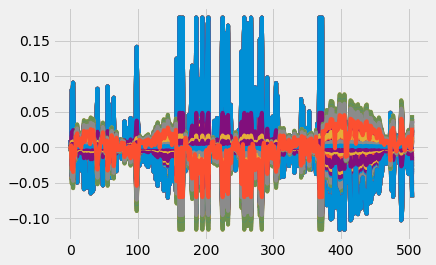

In [29]:
plt.plot(cost_history[0]);

## Second Approach,Using the global and its application in the function

When we use global, it will update the both theta_0 and theta_1, but the problem of updating is we cannot return and we cannot define the parameters inside the function

In [16]:
def update_step(X,y,lr=0.02,iteration=2000):
    """Using the global inside the function, it will update the variables theta_0 and
    theta_1. However, it does not allow to return the variables inside the function."""
    global theta_0,theta_1
    
    for i in range(iteration):
        theta_0 = np.random.randn()
        theta_1 = np.random.randn()
        cost_i=0
        J_history=[]
        for j in range(m):
            dtheta_0 = -(1/m)* (y_prediction(theta_0,theta_1,X))
            dtheta_1 = -(1/m)* (y_prediction(theta_0,theta_1,X))*X
        cost_i = mse_pred(X,y,theta_0,theta_1)   
        theta_0 -= (lr)*(dtheta_0)
        theta_1 -= (lr)*(dtheta_1)
        
        J_history.append(cost_i)
#         return J_history

# update_step(X,y,lr=0.05,iteration=2000)


## Calculate theta_0 and theta_1 and Do Visualization For Y_pred for only one feature
In this approach, it will show us the importance of updating theta_0 and theta_1 simultaneously. As we see in the below code, we calculated two gradient descent (Grad0 and Grad1) in two for loops. Based on this calculations, we upated both theta_0 and theta_1 simultaneously. If we put the calculation of gradient descent in the same loop, the calculation of gradient descent (grad0 and grad1) woul not be simultaneous and would be different.

In [17]:
# Learning Rate
lr = 0.01
iterations = 1000   
m = len(x)

def loop_gradient_descent(x,y,theta,lr,iterations):
    #Initialize theta
    theta = np.zeros((2,1),dtype=float) ##  np.array([[0],[0]])

    #Variables
    Grad_0 = Grad_1 = 0
    
    t0 = t1 = 0
    y_pred = y_prediction(theta[0],theta[1],x)
    
    start_time = time.time()
    # Find gradient 0
    for i in range(iterations):
        for j in range(m):
            Grad_0 = Grad_0 + (y_pred[j]) - (y[j])
            
        # Find gradient 1 
        for k in range(m):
            Grad_1 = Grad_1 + (y_pred[k]) - (y[k]) * (x[k])
            
        t0 = theta[0] - (lr*(1/m) * Grad_0)
        t1 = theta[1] - (lr*(1/m) * Grad_1)
        theta[0] = t0
        theta[1] = t1
        Grad_0 = Grad_1 = 0  
    print("model parameters are:",(theta[0], theta[1]),sep = "\n")
    print(f"time taken for gradient descent parametes are: {round(time.time()-start_time,4)}")
    return theta[0], theta[1]

theta_0, theta_1 = loop_gradient_descent(x,y,theta,lr=0.01,iterations=1000)        

model parameters are:
(array([-1.33566851e-15]), array([0.09761666]))
time taken for gradient descent parametes are: 2.6852


In [18]:
y_pred = [(theta_0 + theta_1  * x[i]) for i in range(m) ]

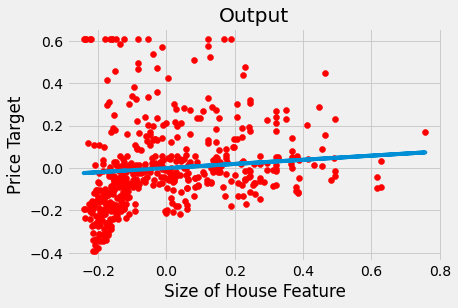

In [19]:
plt.scatter(x,y,c = 'red')
plt.plot(x,y_pred)
plt.xlabel('Size of House Feature')
plt.ylabel('Price Target')
plt.title('Output');  

## Problem: I could not resolve it!!!

In [20]:
# def training(x,y,theta_0,theta_1,lr,iteration):
#     #Variables
#     m = len(y)
#     j_history=[]
#     theta_0_history=[]
#     theta_1_history=[]
#     y_pred_history=[]
# #     iteration=10000
# #     lr=0.005
#     # To Find the variables list
#     for i in range(iteration):
#         theta_0, theta_1 = loop_gradient_descent(x,y,theta,lr,iteration)
#         cost = mse_pred(x,y,theta_0,theta_1)
#         j_history.append(cost)
#         theta_0_history.append(theta_0)
#         theta_1_history.append(theta_1)
# #         if i%1000 ==0:
# #             print(f"iter={iteration}, theta_0={theta_0}, theta_1={theta_1}, cost={cost}")
#     return theta_0_history, theta_1_history, j_history  
# theta_0_history,theta_1_history,j_history = training(x,y,theta_0,theta_1,0.005,10000)
# j_history

In [21]:
# cost_history,theta_0_history,theta_1_history = training(X,y,theta_0,theta_1,iteration=1000,lr=0.05)
# plt.title("Cost Function")
# plt.xlabel("Number of iteration")
# plt.ylabel("Cost")
# plt.plot(j_history)
# plt.ylim(ymin=0)
# plt.xlim(xmin=0)
# plt.show()

# Vectorization


This vectorization follows this equation:

$$
\left[\begin{array}{c}
\theta_0 \\
\theta_1 
\end{array}\right]=\left[\begin{array}{c}
\theta_0\\
\theta_1  
\end{array}\right] + \alpha
\left[\begin{array}{c}
-\dfrac{\partial J}{\partial \theta_0}\\
-\dfrac{\partial J}{\partial \theta_1}  
\end{array}\right]
$$


#### we can write J partial derivative in this way
for J=0
$$  
\theta_0 = \theta_0 - \alpha \dfrac{\partial}{\partial \theta_0}J(\theta_0 , \theta_1)
$$

for J=1
$$  
\theta_1 = \theta_1 - \alpha \dfrac{\partial}{\partial \theta_1}J(\theta_0 , \theta_1)
$$

In the following equation: 
$$
h_\theta(x_i) = \theta_0 + \theta_1 x_i
$$

$$
\theta_0 = \theta_0 - \alpha \sum_{i=1}^n (h_\theta(x_i) - y_i)
$$

for J=1
### $$  
\theta_1 = \theta_1 - \alpha \sum_{i=1}^n (h_\theta(x_i) - y_i) x_i
$$
$$
\nabla J_\theta = \sum_{i=1}^n (h_\theta(x_i) - y_i) x_i
$$


$$
Xnew = \left[\begin{array}{c&c}
1 & 1 & ...&1 \\
X_1^1 & X_1^2 & ...&X_1^m\\
X_2^1 & X_2^2 & ...&X_2^m\\
.... & .... & ...&.....\\
X_n^1 & X_n^2 & ...& X_n^m\\
\end{array}\right]
$$

$$
\nabla J_\theta = (Xnew)^T \times ((Xnew) \times (\theta - y))
$$

$$\theta_(new) = \theta_(old) + \alpha(-\nabla J_\theta)$$

## Find theta for all the features

In [22]:
# Initialize theta
theta = np.ones(n)
y_pred_vec = X@theta
print(y_pred_vec.shape)
print(X.shape)
print(theta.shape)
print(y.shape)
print((X@theta).shape)
y=y.flatten()
print((X@theta-y).shape)

(506,)
(506, 14)
(14,)
(506, 1)
(506,)
(506,)


In [23]:
cost = (1/(2*m))*np.transpose((X@theta - y))@(X@theta - y)
cost

1.3997529082284257

In [24]:
def cost_vectorization(theta, x, y):
#     m=len(X)
    return ((1/(2*m))*np.transpose((x@theta-y))@(x@theta-y))
    
cost_vectorization(theta, X, y)

1.3997529082284257

In [25]:
print(np.ones(len(x)).shape)
print(x.flatten().shape)
print(np.array([2]).shape)
np.array([2])##shape:(1,)
np.array([np.ones(len(x)), x.flatten()]).T.shape
x_new = np.vstack((np.ones(len(x)),x)).T
print("x_new_shape:", x_new.shape)
Grad_vec = (1/m)*(np.transpose(X)@(X@theta-y))##(14,506)(506,)
Grad_vec

(506,)
(506,)
(1,)
x_new_shape: (506, 2)


array([ 1.        ,  0.0781462 , -0.11042922,  0.26203023,  0.05504439,
        0.23892543, -0.06454256,  0.26116344, -0.14536772,  0.43106387,
        0.38303455,  0.16591512, -0.09920797,  0.1835281 ])

# Calculations for all features
### Find theta and Cost Function for all the features

In [26]:
iteration = 10000
n= X.shape[1]
def gradient_descent_vec(theta, X=X, y=y, iteration=iteration):
    
    theta = np.ones(n)
    alpha = 0.0005
    iteration = 1000
    cost_list = []
    y = y.flatten()
    for i in range(iteration):
        Grad = np.transpose(X)@(X@theta - y)##
        #Grad = X.T
        theta = theta - alpha*(1/m)*Grad
        cost_val = cost_vectorization(X,y,theta)
        cost_list.append(cost_val)
    return theta, cost_list
#         theta = theta - alpha*(1/m)*Grad_vec
#     return theta
theta, cost_list = gradient_descent_vec(theta)
len(cost_list)

1000

Text(0.5, 1.0, 'Vectorization: MSE Trend over Iterations')

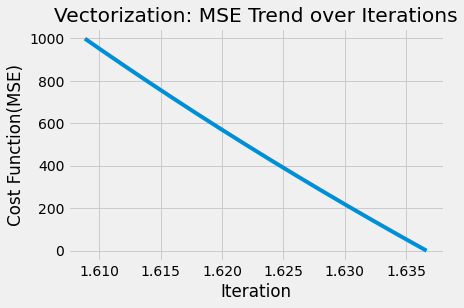

In [27]:
plt.plot(cost_list,np.arange(1000))
plt.xlabel("Iteration"); plt.ylabel("Cost Function(MSE)"); plt.title("Vectorization: MSE Trend over Iterations")

In [ ]:
%%time
a = 0.0005
theta = np.ones(n)

J_value_history = []
iteration = 100000
theta_list = []

for i in range(iteration):
    
    theta = theta - a*(1/m)*np.transpose(X)@(X@theta - y)
    theta_list.append(theta)
    J_val = cost_vectorization(theta,X,y)
    J_value_history.append(J_val)

In [ ]:
plt.plot(np.arange(0, 100000),J_value_history)
plt.xlabel("Iteration"); plt.ylabel("Cost Function(MSE)"); plt.title("Vectorization: MSE Trend over Iterations")

In [ ]:

figsize(8,8)

methods = ("For Loop", "Vectorization")
x = [0,1]
time = [4558, 1.75]
plt.bar(x, time, width=0.3, align="center", alpha = 0.8)
plt.xticks(x, methods)
plt.ylabel("Running Time(Seconds)")
plt.title("Comparison of running time")

# Compare with Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print("coefficients from Sklearn is:", lr.coef_)
print("intercept coefficients from Sklearn is:", lr.intercept_)
print(theta)
lr.coef_[0][1]
lr.coef_.shape
# theta_1 = lr.coef_[1]
# theta_1
Sklear_coef = pd.DataFrame(lr.coef_.T, columns=["theta"])

In [ ]:
theta.shape
theta_df = pd.DataFrame(theta)
# theta_df["theta_0"] = theta_0_history

# Find theta and Cost for one feature of house size and plot the y_pred figure

In [40]:
# Learning Rate
lr = 0.01
iterations = 10000   
y=y.reshape(-1,1)
x_new = np.vstack((np.ones(len(x)),x)).T ##(506, 2)
def loop_gradient_descent_vec(x,y,theta,lr,iterations):
    theta_ = np.zeros((2,1), dtype=float)
    cost_history = []
    #Elapsed Time for Gradient Descent
    start_time = time.time()
    
    for i in range(iterations):
#         Grad = x_new.T@(x_new@(theta_)-y)##(2, 506)((506,2)(2,1)-(506,1))=(2,506)(506,1)=(2,1)
        theta_ = theta_ - (lr*(1/m)*(x_new.T@(x_new@(theta)-y)))
        print(theta_.shape)
        J_val= (1/(2*m))*np.transpose((x_new@theta_-y))@(x_new@theta_-y)
        cost_history.append(J_val)
#     theta   
    print("model parameters are", theta_, sep="\n")
#     print("Time Taken for Gradient Descent", time.time()-start_time)
    return theta_, cost_history
        
theta_, cost_history = loop_gradient_descent_vec(x,y,theta_,lr,iterations)
# theta_0, theta_1
theta_

(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(

(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(

(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(

(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(

(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(

(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(

(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)
(2, 506)


KeyboardInterrupt: 

In [54]:
print(theta_.shape)
print(x_new.shape)
print((x_new.dot(theta_)).shape)

(2, 506)
(506, 2)
(506, 506)


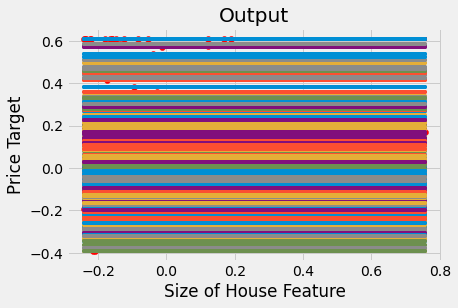

In [30]:
y_pred_vec = x_new.dot(theta_)
plt.scatter(x,y,c="red")
plt.plot(x,y_pred_vec)

plt.xlabel('Size of House Feature')
plt.ylabel('Price Target')
plt.title('Output'); 

In [ ]:
theta_lst=[]
for t in theta:
    a = 0.5*np.sum((t*x - y)**2)
    j.append(a)
    theta_lst.append(t)

plt.plot(theta_lst,j)
plt.xlabel(r'$\Theta_1$')
plt.ylabel(r'$J(\theta_0,\theta_1)$');

In [31]:
len(cost_history)
len(np.arange(1000))

1000

ValueError: x and y must have same first dimension, but have shapes (10000, 506, 506) and (1000,)

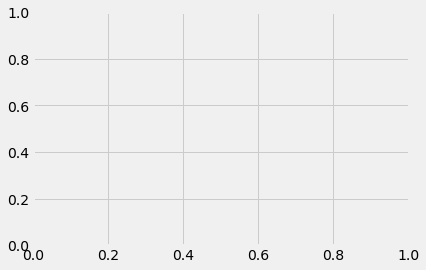

In [32]:
plt.plot(cost_history,np.arange(1000))
# plt.xlabel("Iteration"); plt.ylabel("Cost Function(MSE)"); plt.title("Vectorization: MSE Trend over Iterations")

In [ ]:
def training(x,y,theta_0,theta_1,lr,iteration): 
    m = len(y)
    j_history=[]
    theta_0_history=[]
    theta_1_history=[]
    for i in range(iteration):
        theta_0, theta_1 = loop_gradient_descent(x,y,theta,lr,iteration)
        cost = mse_pred(x,y,theta_0,theta_1)
        j_history.append(cost)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
    return theta_0_history, theta_1_history, j_history
theta_0_history,theta_1_history,j_history = training(x,y,theta_0,theta_1,0.005,10000)
j_history

In [ ]:
def training(x,y,theta_0,theta_1,lr,iteration):
    #Variables
    m = len(y)
    j_history=[]
    theta_0_history=[]
    theta_1_history=[]
    y_pred_history=[]
#     iteration=10000
#     lr=0.005
    # To Find the variables list
    for i in range(iteration):
        theta_0, theta_1 = loop_gradient_descent(x,y,theta,lr,iteration)
        cost = mse_pred(x,y,theta_0,theta_1)
        j_history.append(cost)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
#         if i%1000 ==0:
#             print(f"iter={iteration}, theta_0={theta_0}, theta_1={theta_1}, cost={cost}")
    return theta_0_history, theta_1_history, j_history  
theta_0_history,theta_1_history,j_history = training(x,y,theta_0,theta_1,0.005,10000)
j_history

In [ ]:
xx, yy = np.meshgrid(theta0_arr, theta1_arr)


In [ ]:
fig = plt.figure(figsize =(14, 9))
ax = Axes3D(fig)
surf = ax.plot_surface(xx, yy, J_vals, cstride = 5, cmap = 'jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.set_xlabel('\u03B81', fontweight ='bold')  
ax.set_ylabel('\u03B80', fontweight ='bold')  
ax.set_zlabel('J (\u03B81, \u03B80)', fontweight ='bold') 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
# Create a set of subplots.
fig = plt.figure(figsize=(16, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, J_vals, alpha=0.5, cmap='jet')

# Create surface plot.
ax.plot_surface(xx, yy, J_vals, alpha=0.5, cmap='jet')
ax.set_zlabel('Cost', fontsize=14)
ax.set_title('Surface plot of cost function')

# Create labels for both plots.
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=14)
    ax.set_ylabel(r'$\theta_1$', fontsize=14)

